In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.style as style

In [4]:
plt.style.use("fivethirtyeight")

In [5]:
plt.style.use("default")

In [6]:
wnba = pd.read_csv("wnba.csv")

In [7]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [8]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [9]:
wnba["Experience"]

0       2
1      12
2       4
3       6
4       R
       ..
138     6
139     9
140     2
141     8
142     2
Name: Experience, Length: 143, dtype: object

In [10]:
wnba["Experience"].value_counts().sort_index()

Experience
1     12
10     5
11     4
12     4
13     3
14     3
15     2
2     11
3     19
4     11
5     14
6     14
7      4
8      3
9     11
R     23
Name: count, dtype: int64

In [11]:
wnba["Experience"] = wnba["Experience"].str.replace("R", "0").astype(int)

In [12]:
wnba["Experience"].value_counts().sort_index()

Experience
0     23
1     12
2     11
3     19
4     11
5     14
6     14
7      4
8      3
9     11
10     5
11     4
12     4
13     3
14     3
15     2
Name: count, dtype: int64

we have to take care of difference,direction and size

Nominal data = difference available only

Ordinal data = difference and direction available

Ratio/Interval data = difference,direction and size available

ratio data has no value of zero '0', zero ki presence nahi hogi

Interval data has value of zero '0', zero ki presence hogi

zero means absence of the value

In [13]:
def exp_ord(exp):
    if exp == 0:
        return "Rookie"
    elif exp in range(1,4):
        return "Little experience"
    elif exp in [4,5]:
        return "Experienced"
    elif exp in range(6,11):
        return "Very experienced"
    else:
        return "Veteran"

In [14]:
wnba["Experience"].apply(exp_ord)

0      Little experience
1                Veteran
2            Experienced
3       Very experienced
4                 Rookie
             ...        
138     Very experienced
139     Very experienced
140    Little experience
141     Very experienced
142    Little experience
Name: Experience, Length: 143, dtype: object

In [15]:
wnba["Exp_ordinal"] = wnba["Experience"].apply(exp_ord)

In [16]:
wnba["Exp_ordinal"].value_counts()

Exp_ordinal
Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: count, dtype: int64

In [17]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]]

Exp_ordinal
Rookie               23
Little experience    42
Experienced          25
Very experienced     37
Veteran              16
Name: count, dtype: int64

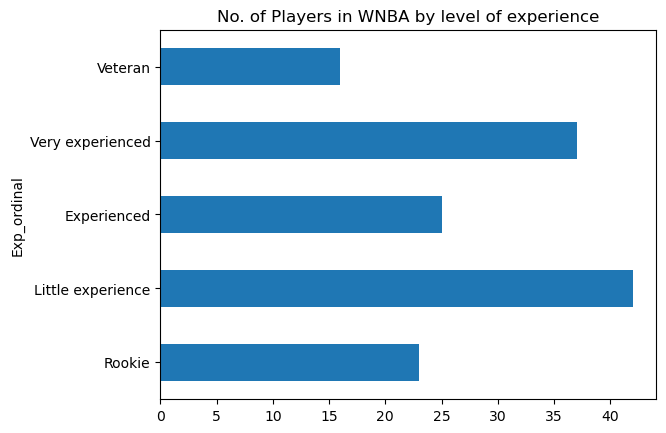

In [18]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.barh(title = "No. of Players in WNBA by level of experience")
plt.show()

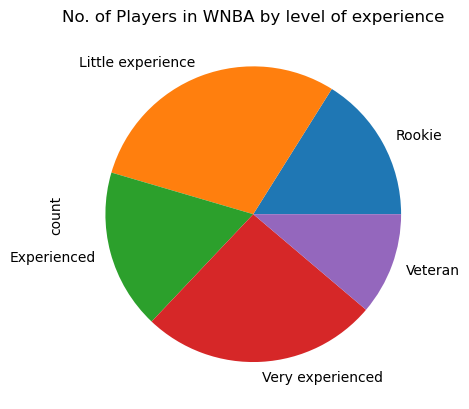

In [19]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(title = "No. of Players in WNBA by level of experience")
plt.show()

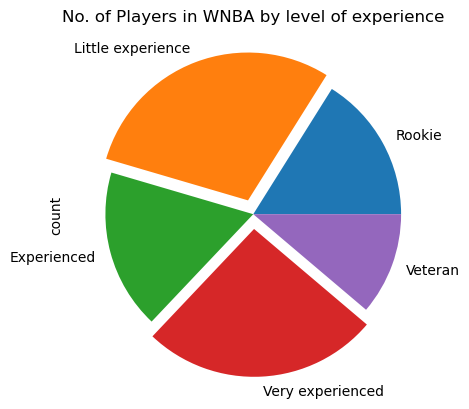

In [20]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(explode = [0,0.1,0,0.1,0], title = "No. of Players in WNBA by level of experience")
plt.show()

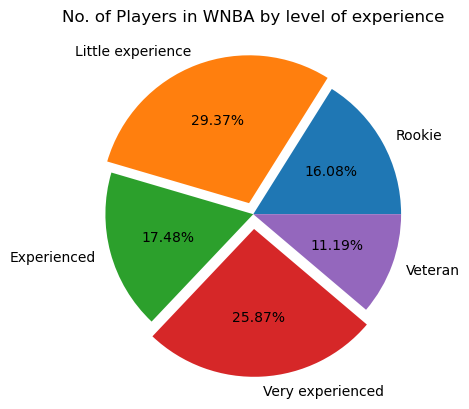

In [21]:
wnba["Exp_ordinal"].value_counts().iloc[[-2,0,2,1,-1]].plot.pie(explode = [0,0.08,0,0.1,0], autopct = "%0.2f%%" , title = "No. of Players in WNBA by level of experience")
plt.ylabel("")
plt.show()

In [22]:
wnba["Exp_ordinal"].value_counts(normalize = True).iloc[[-2,0,2,1,-1]]*100   #if we don't want to use explode method,we can use this method before making pie chart

Exp_ordinal
Rookie               16.083916
Little experience    29.370629
Experienced          17.482517
Very experienced     25.874126
Veteran              11.188811
Name: proportion, dtype: float64

In [23]:
wnba["Pos"]

0        F
1      G/F
2        G
3      G/F
4        G
      ... 
138      G
139      F
140      G
141    F/C
142      G
Name: Pos, Length: 143, dtype: object

In [24]:
import seaborn as sns

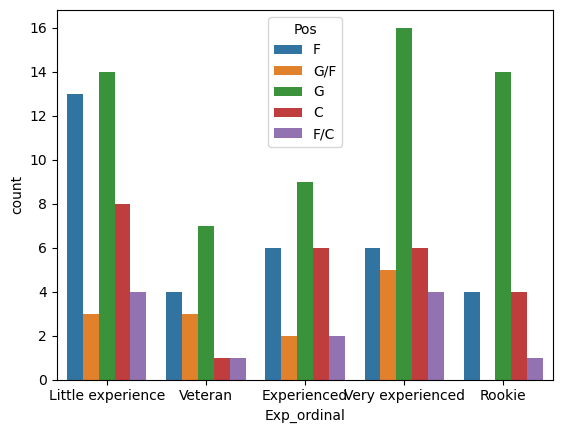

In [25]:
sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba)
plt.show()

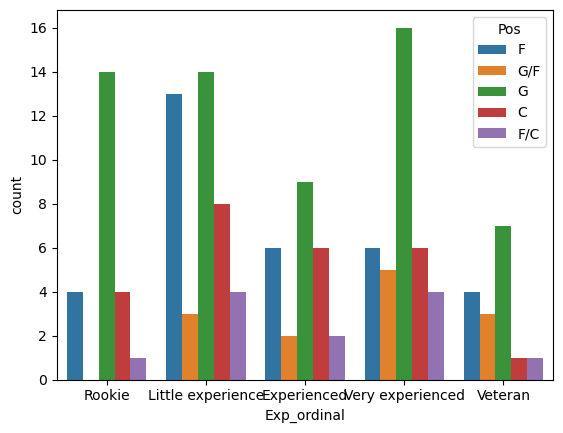

In [26]:
import seaborn as sns
sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba, 
              order = ["Rookie", "Little experience", "Experienced", "Very experienced", "Veteran"])
plt.show()

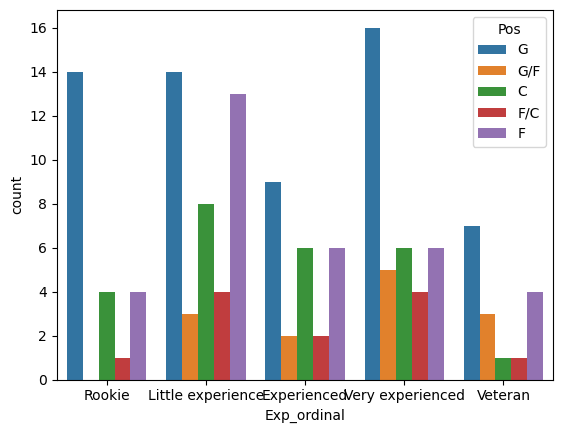

In [27]:
sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba, 
              order = ["Rookie", "Little experience", "Experienced", "Very experienced", "Veteran"],
             hue_order = ["G", "G/F", "C", "F/C", "F"])
plt.show()

In [28]:
wnba["Age"].mean()

27.076923076923077

In [29]:
wnba["MIN"].mean()

496.97202797202794

In [30]:
wnba["Age"].apply(lambda age:"old" if age>= 27 else "Young")

0      Young
1        old
2      Young
3        old
4      Young
       ...  
138      old
139      old
140      old
141      old
142      old
Name: Age, Length: 143, dtype: object

In [31]:
wnba["age_cat"] = wnba["Age"].apply(lambda age:"old" if age>= 27 else "Young")

wnba["min_cat"] = wnba["MIN"].apply(lambda Min:"avg or above" if Min>= 497 else "below average")

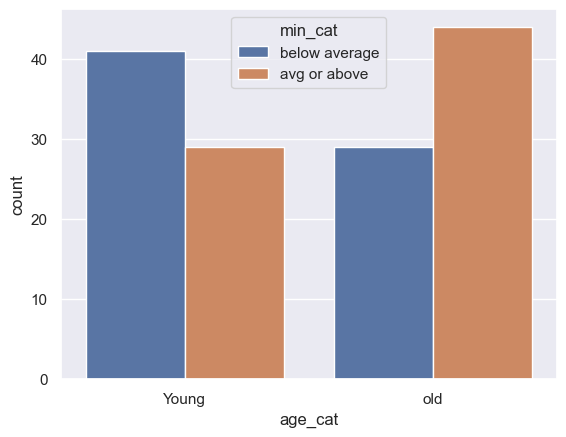

In [32]:
sns.set_theme()
sns.countplot(x = "age_cat", hue = "min_cat", data = wnba)
plt.show()

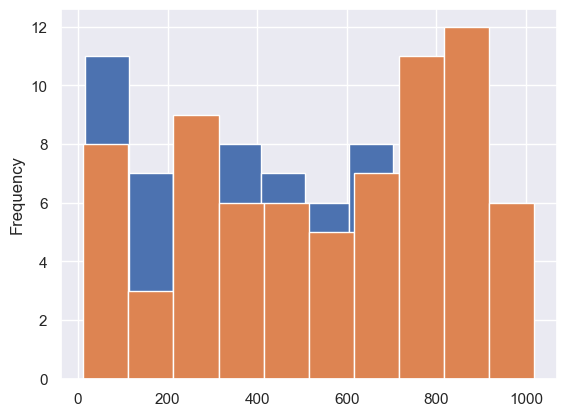

In [33]:
wnba.groupby("age_cat")["MIN"].plot.hist()
plt.show()

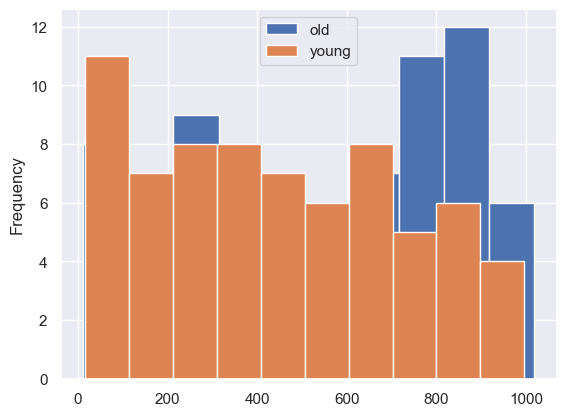

In [34]:
wnba[wnba["Age"]>= 27]["MIN"].plot.hist(label = "old")
wnba[wnba["Age"]< 27]["MIN"].plot.hist(label = "young")
plt.legend()
plt.show()

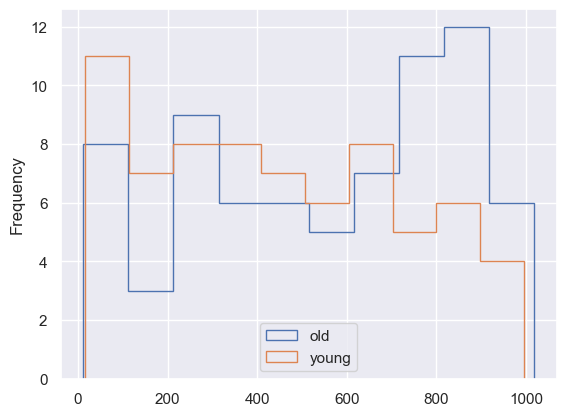

In [35]:
wnba[wnba["Age"]>= 27]["MIN"].plot.hist(label = "old", histtype = "step")
wnba[wnba["Age"]< 27]["MIN"].plot.hist(label = "young",  histtype = "step")
plt.legend()
plt.show()

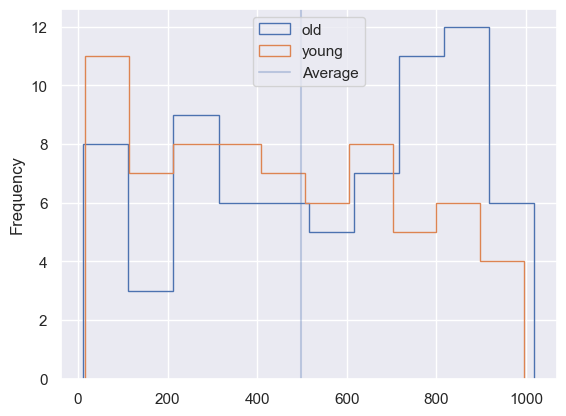

In [36]:
wnba[wnba["Age"]>= 27]["MIN"].plot.hist(label = "old", histtype = "step")
wnba[wnba["Age"]< 27]["MIN"].plot.hist(label = "young",  histtype = "step")
plt.axvline(497, label = "Average", alpha = 0.3)
plt.legend(loc = "upper center")
plt.show()

In [37]:
wnba["Age"].min()

21

In [38]:
wnba["Age"].max()

36

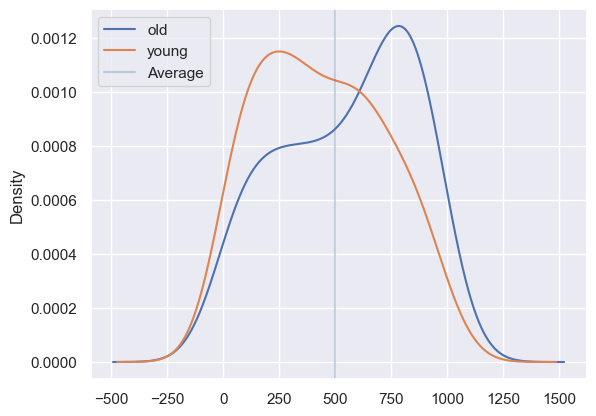

In [39]:
wnba[wnba["Age"]>= 27]["MIN"].plot.kde(label = "old")
wnba[wnba["Age"]< 27]["MIN"].plot.kde(label = "young")
plt.axvline(497, label = "Average", alpha = 0.3)
plt.legend(loc = "upper left")
plt.show()

In [40]:
positions = wnba["Pos"].unique()
positions

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

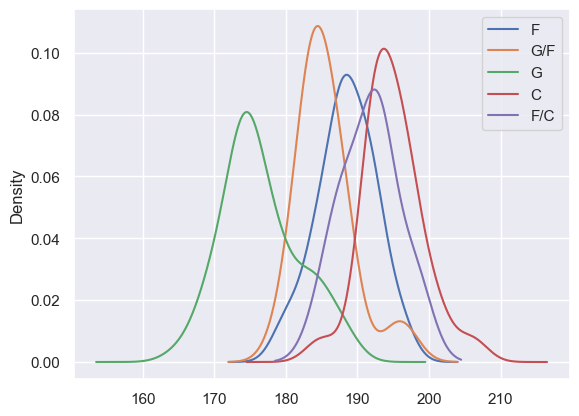

In [41]:
plt.subplot(1,1,1)

for pos in positions:
    bol_pos = wnba["Pos"] == pos
    wnba[bol_pos]["Height"].plot.kde(label = pos)
plt.legend()   
plt.show()

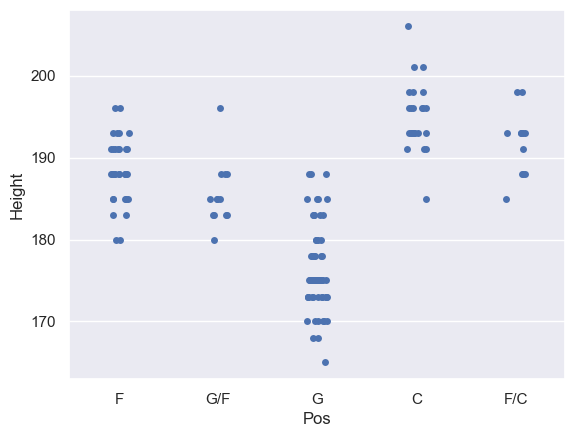

In [42]:
sns.stripplot(x = "Pos", y = "Height" , data = wnba)
plt.show()

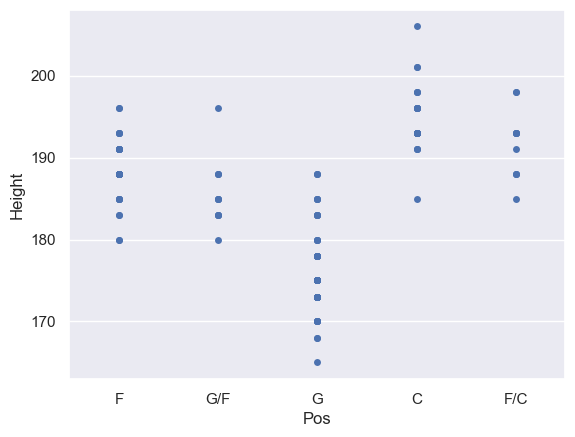

In [43]:
sns.stripplot(x = "Pos", y = "Height" , data = wnba, jitter = False)
plt.show()

In [44]:
wnba["Weight"].describe()

count    142.000000
mean      78.978873
std       10.996110
min       55.000000
25%       71.500000
50%       79.000000
75%       86.000000
max      113.000000
Name: Weight, dtype: float64

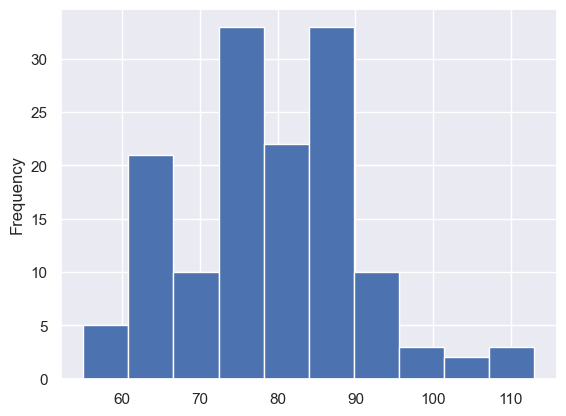

In [45]:
wnba["Weight"].plot.hist()
plt.show()

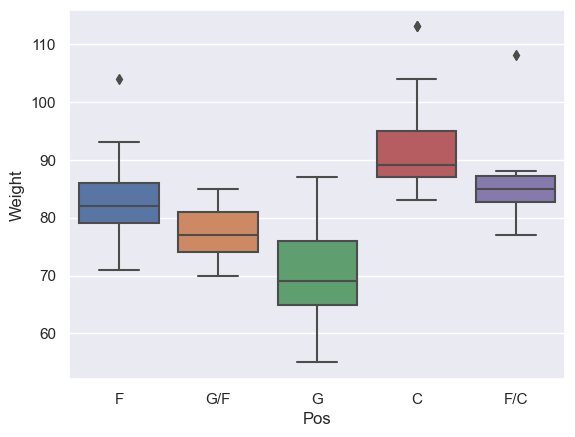

In [46]:
sns.boxplot(x = "Pos", y = "Weight", data = wnba, whis = 1.5)   #whisker rate by default is 1.5
plt.show()

interquartile_range = 75% value - 25% value we will get iqr

interquartile_range > 1.5 , interquartile_range < 1.5

interquartile_range * 1.5

spread is standard deviation

In [47]:
# how to calculate outlier

In [48]:
wnba[wnba["Pos"] == "F"]["Weight"].describe()

count     33.000000
mean      83.090909
std        6.458346
min       71.000000
25%       79.000000
50%       82.000000
75%       86.000000
max      104.000000
Name: Weight, dtype: float64

In [49]:
iqr = 86 - 79

In [50]:
value = iqr*1.5
value

10.5

In [51]:
lower_boundary = 79-(iqr*1.5)   #anything goes beyond this value is cosidered outlier
lower_boundary

68.5

In [52]:
upper_boundary = 86+(iqr*1.5)  #anything goes above this value is cosidered outlier
upper_boundary

96.5

In [ ]:
#calculate outliers from height column